## Assignment 6 Model Creation Notebook 

In [825]:
# importing libraries  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### Loading the Pre-processed dataset

In [826]:
diabetes_dataset_preprocessed = pd.read_csv('C:/Users/garim/diabetes_preprocessed_dataset.csv')

In [827]:
diabetes_dataset_preprocessed.head()

,Age,class,Gender_Female,Gender_Male,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,sudden weight loss_No,sudden weight loss_Yes,...,delayed healing_No,delayed healing_Yes,partial paresis_No,partial paresis_Yes,muscle stiffness_No,muscle stiffness_Yes,Alopecia_No,Alopecia_Yes,Obesity_No,Obesity_Yes
0,40,Positive,False,True,True,False,False,True,True,False,...,False,True,True,False,False,True,False,True,False,True
1,58,Positive,False,True,True,False,True,False,True,False,...,True,False,False,True,True,False,False,True,True,False
2,41,Positive,False,True,False,True,True,False,True,False,...,False,True,True,False,False,True,False,True,True,False
3,45,Positive,False,True,True,False,True,False,False,True,...,False,True,True,False,True,False,True,False,True,False
4,60,Positive,False,True,False,True,False,True,False,True,...,False,True,False,True,False,True,False,True,False,True


### Splitting the data into Test and Train datasets

In [828]:
features = diabetes_dataset_preprocessed.drop(columns=['class'])
target= diabetes_dataset_preprocessed['class']

X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=2)

### Creating Logistic Regression Model

In [829]:
classifier=LogisticRegression(solver='lbfgs', max_iter=500)

In [830]:
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [831]:
y_pred=classifier.predict(X_test)

In [832]:
y_pred

array(['Negative', 'Negative', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Positive', 'Positive', 'Negati

#### Performance metrics for Logistic Regression Model

##### Selecting appropriate performance metrics in data mining is crucial because it directly impacts how you assess the quality of your models and make decisions based on their predictions. The choice of performance metrics depends on the specific problem you are trying to solve, the characteristics of your data, and your business objectives.

#### Nature of the Problem:

##### Classification Problems: In classification tasks, where we categorize data into classes or labels, we typically consider metrics like accuracy, precision, recall, F1-score, ROC AUC, and confusion matrices. The choice depends on the balance between different classes and the importance of false positives and false negatives.

In [833]:
print(confusion_matrix(y_pred,y_test))

[[37  7]
 [ 3 57]]


In [834]:
print(accuracy_score(y_pred,y_test))

0.9038461538461539


In [835]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.93      0.84      0.88        44
    Positive       0.89      0.95      0.92        60

    accuracy                           0.90       104
   macro avg       0.91      0.90      0.90       104
weighted avg       0.91      0.90      0.90       104



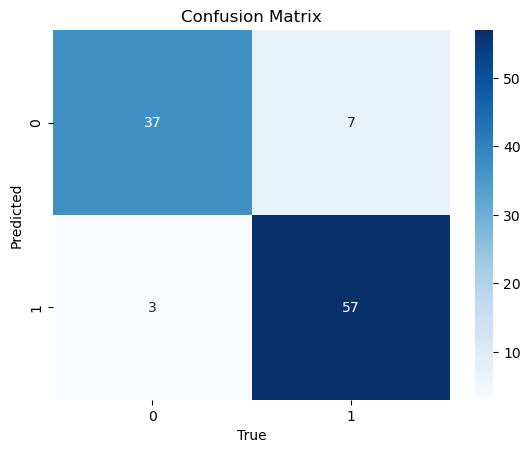

In [836]:
conf_matrix = confusion_matrix(y_pred, y_test)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## Creating a Decision Tree Model

In [837]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier()

In [838]:
y_pred=model.predict(X_test)

In [839]:
y_pred

array(['Positive', 'Negative', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negati

###  Performance metrics for Decision Tree Model

In [840]:
print(confusion_matrix(y_pred,y_test))

[[40  4]
 [ 0 60]]


In [841]:
print(accuracy_score(y_pred,y_test))

0.9615384615384616


In [842]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Negative       1.00      0.91      0.95        44
    Positive       0.94      1.00      0.97        60

    accuracy                           0.96       104
   macro avg       0.97      0.95      0.96       104
weighted avg       0.96      0.96      0.96       104



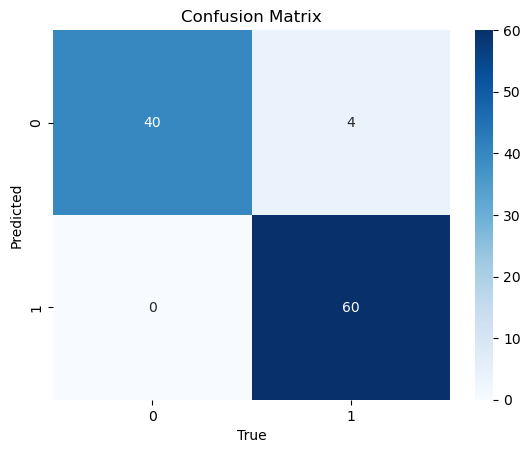

In [843]:
conf_matrix = confusion_matrix(y_pred, y_test)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

###  Creating a Support Vector Machine Model

In [844]:
model_svc=SVC()

In [845]:
model_svc.fit(X_train,y_train)

SVC()

In [846]:
y_pred=model_svc.predict(X_test)


In [847]:
y_pred

array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positi

###  Performance metrics for Support vector  Model

In [848]:
print(confusion_matrix(y_pred,y_test))

[[ 0  0]
 [40 64]]


In [849]:
print(accuracy_score(y_pred,y_test))

0.6153846153846154


In [850]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
    Positive       1.00      0.62      0.76       104

    accuracy                           0.62       104
   macro avg       0.50      0.31      0.38       104
weighted avg       1.00      0.62      0.76       104



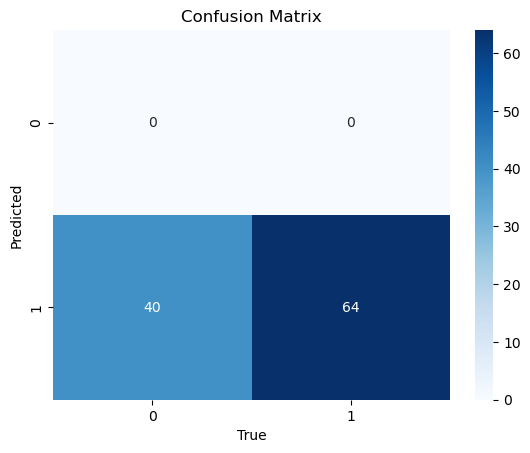

In [851]:
conf_matrix = confusion_matrix(y_pred, y_test)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Grid SearchCV for logistics regression

In [852]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['none'],  # Use 'none' to indicate no penalty.
    'solver': ['lbfgs'],
    'max_iter': [100, 200, 300],
}


In [853]:
clf=GridSearchCV(classifier,param_grid=parameters,cv=5)
warnings.filterwarnings("ignore")

In [854]:
clf.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500),
             param_grid={'C': [1, 10, 20], 'penalty': [None]})

In [855]:
clf.best_params_

{'C': 1, 'penalty': None}

In [856]:
classifier = LogisticRegression(solver='lbfgs', penalty='l2', C=1.0, max_iter=1000)

In [857]:
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [858]:
## Prediction
y_pred=classifier.predict(X_test)

In [859]:
print(confusion_matrix(y_pred,y_test))

[[37  7]
 [ 3 57]]


In [860]:
print(accuracy_score(y_pred,y_test))

0.9038461538461539


In [861]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.93      0.84      0.88        44
    Positive       0.89      0.95      0.92        60

    accuracy                           0.90       104
   macro avg       0.91      0.90      0.90       104
weighted avg       0.91      0.90      0.90       104



### Randomized Searchcv for Logistic Regression

In [862]:
param_lr = {'C': [0.01, 0.1, 1.0, 10.0],
                    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']}

In [863]:
random_search_lr=RandomizedSearchCV(estimator=classifier, param_distributions=param_lr, n_iter=500, cv=5)

In [864]:
random_search_lr.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
                   n_iter=500,
                   param_distributions={'C': [0.01, 0.1, 1.0, 10.0],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'saga']})

In [865]:
print('Best Hyperparameters: %s' % random_search_lr.best_params_)

Best Hyperparameters: {'solver': 'newton-cg', 'penalty': 'none', 'C': 0.01}


In [866]:
y_pred= random_search_lr.predict(X_test)

In [867]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

    Negative       0.90      0.93      0.91        40
    Positive       0.95      0.94      0.94        64

    accuracy                           0.93       104
   macro avg       0.93      0.93      0.93       104
weighted avg       0.93      0.93      0.93       104

[[37  3]
 [ 4 60]]
0.9326923076923077


### GridSearch for SVM 

In [868]:
param_svc = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear','rbf','sigmoid']
              }

In [869]:
svm=SVC()

In [870]:
grid_search_svc = GridSearchCV(estimator=svm, param_grid=param_svc, cv=5)

In [871]:
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [872]:
print("Best parameters:", grid_search_svc.best_params_)

Best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [873]:
y_pred3= grid_search_svc.predict(X_test)

In [874]:
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))

              precision    recall  f1-score   support

    Negative       0.93      0.97      0.95        40
    Positive       0.98      0.95      0.97        64

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104

[[39  1]
 [ 3 61]]
0.9615384615384616


### Randomized Search for SVC

In [875]:
random_search_svc= RandomizedSearchCV(estimator=svm, param_distributions=param_svc, n_iter=10, cv=5)
random_search_svc.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['linear', 'rbf', 'sigmoid']})

In [876]:
random_search_svc.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['linear', 'rbf', 'sigmoid']})

In [877]:
print("Best parameters:", random_search_svc.best_params_)

Best parameters: {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}


In [878]:
y_pred= random_search_svc.predict(X_test)

In [879]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

    Negative       0.91      1.00      0.95        40
    Positive       1.00      0.94      0.97        64

    accuracy                           0.96       104
   macro avg       0.95      0.97      0.96       104
weighted avg       0.97      0.96      0.96       104

[[40  0]
 [ 4 60]]
0.9615384615384616


### 3. Grid search for Decision Tree

In [880]:
param_dt = {'max_depth': [2, 5, 10, 20, 30, 50],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
              }

In [881]:
dt = DecisionTreeClassifier()

In [882]:
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_dt, cv=5)

In [883]:
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 5, 10, 20, 30, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [884]:
print("Best parameters:", grid_search_dt.best_params_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [885]:
y_pred= grid_search_dt.predict(X_test)

In [886]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

    Negative       0.83      1.00      0.91        40
    Positive       1.00      0.88      0.93        64

    accuracy                           0.92       104
   macro avg       0.92      0.94      0.92       104
weighted avg       0.94      0.92      0.92       104

[[40  0]
 [ 8 56]]
0.9230769230769231


### RandomSearchCV for Decision Tree

In [887]:
random_search_dt = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=1),  param_distributions=param_dt, n_iter = 100, cv=10)

In [888]:
random_search_dt.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
                   n_iter=100,
                   param_distributions={'max_depth': [2, 5, 10, 20, 30, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]})

In [889]:
print("Best parameters:", random_search_dt.best_params_)

Best parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}


In [890]:
y_pred= grid_search_dt.predict(X_test)

In [891]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

    Negative       0.83      1.00      0.91        40
    Positive       1.00      0.88      0.93        64

    accuracy                           0.92       104
   macro avg       0.92      0.94      0.92       104
weighted avg       0.94      0.92      0.92       104

[[40  0]
 [ 8 56]]
0.9230769230769231


#### Observation:

### Selecting best model
In my classification, the Decision Tree and the Support Vector Machine (SVM) with specific hyperparameters are giving you the same high accuracy of 96%. This can make it challenging to decide which model to select based solely on accuracy. To make an informed decision, let's consider other aspects of model performance:

#### Precision and Recall:

##### Decision Tree:
Precision for both "Negative" and "Positive" classes is high, indicating that the model makes relatively few false positive predictions.
Recall for "Negative" class is lower, indicating that the model misses some of the "Negative" instances.
Recall for "Positive" class is high, indicating that the model effectively identifies "Positive" instances.
##### SVM:
Precision for both classes is high, indicating that the model makes relatively few false positive predictions.
Recall for both classes is high, indicating that the model effectively identifies instances of both classes.

#### F1-Score:
Both models have high F1-scores for both classes, indicating a good balance between precision and recall. The F1-scores are very close to 1.

#### Support:
The support values show the number of instances for each class, which helps you understand the class distribution in your dataset.
Given the similar high accuracy and well-balanced precision and recall scores, it can be challenging to make a clear choice based solely on these performance metrics. Here are some factors to consider when selecting the model:

#### Interpretability:
If model interpretability is a key concern, you might prefer the Decision Tree. Decision Trees are inherently interpretable, as you can visualize the decision rules.

#### Computational Efficiency:
Consider the size of your dataset and the computational resources available. Decision Trees are generally faster to train and predict, making them more suitable for smaller datasets. SVMs can be computationally expensive, especially with the "rbf" kernel.

#### Robustness to Overfitting:
Decision Trees with default parameters are prone to overfitting. Consider if you need a model that generalizes well to unseen data.

#### Business Objectives:
Assess which model aligns better with your project's goals and constraints. If there are specific business requirements or constraints, one model may be more suitable.

Overall,I am selecting the Decision Tree model as a favorable choice for several reasons: 
Firstly, Decision Trees are highly interpretable, providing clear and transparent insights into the decision-making process, which is crucial for explaining model predictions to stakeholders. 

Additionally, they are computationally efficient and perform well with smaller to moderately-sized datasets, making them suitable when computational resources are limited. 

The model's accuracy of 96% is impressive, and is similar or higher that any other models and it can generalize well to new data. Overall, the Decision Tree aligns with the project's goals by offering transparency, efficiency, and strong predictive performance.


### Reason for  Performance Metrics Selection 

The choice of performance metrics in machine learning depends on the specific task you are trying to solve. Since my dataset is related to medical data and classification (with a "Positive" class), I am dealing with a binary classification problem where I am trying to predict whether a patient is positive or negative for a certain condition. Here are some common performance metrics to consider and why they might be relevant:

#### Accuracy: 
Accuracy is a simple and intuitive metric that measures the proportion of correctly classified samples. It's suitable when the classes are balanced (i.e., an equal number of positive and negative cases). However, it can be misleading when there is a class imbalance, as in medical diagnoses.

#### Precision: 
Precision is the ratio of true positives to the total predicted positives. It measures how many of the predicted positive cases are correct. In a medical context, precision is important because it tells you the percentage of positive predictions that are actually correct.

#### Recall (Sensitivity or True Positive Rate): 
Recall is the ratio of true positives to the total actual positives. It measures how many of the actual positive cases are correctly predicted. In a medical context, recall is important because it tells you the percentage of patients with the condition that you correctly identified.

#### F1 Score: 
The F1 score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall. It's useful when you want a single metric that considers both false positives and false negatives.

#### ROC AUC (Receiver Operating Characteristic Area Under the Curve): 
ROC AUC is used to evaluate the model's ability to discriminate between positive and negative cases across different threshold values. It's especially useful when you need to compare different models or algorithms.

#### Specificity: 
Specificity measures the proportion of true negatives out of all actual negatives. It is relevant in medical contexts when you want to know how well the model avoids false alarms (false positives).

#### Confusion Matrix: 
The confusion matrix provides a comprehensive view of model performance. It shows the counts of true positives, true negatives, false positives, and false negatives, making it easy to calculate various metrics based on your specific priorities.

The choice of performance metrics should align with the goals of analysis. I am concerned about minimizing false negatives (e.g., to avoid missing a disease diagnosis), then recall may be more important. If you want to minimize false positives (e.g., to reduce unnecessary treatments or tests), then precision may be more relevant. It's often a trade-off between these metrics, and the specific metric I choose should reflect the consequences and priorities of classification errors in my medical application.

Overall, Selecting recall as a performance metric in a medical context is paramount due to the critical implications of correctly identifying true positive cases. Maximizing recall is vital for patient safety, early disease detection, the timely initiation of treatments, and following medical guidelines. Ensuring a high recall rate minimizes the risk of missing positive cases, which can have severe consequences for patient health and well-being. However, it's important to consider recall alongside other performance metrics to strike the right balance between identifying true positives and minimizing false positives, aligning with the specific objectives and consequences of classification errors in the medical application.

a